## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# If any of the above libraries or packages are missing...
# ...use !pip install package-name

## Loading Dataset

In [47]:
df = pd.read_csv("housing.csv")

In [48]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [49]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [62]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**There are 0 null values. Hence NULL value treatment is not required.**

## Visualization

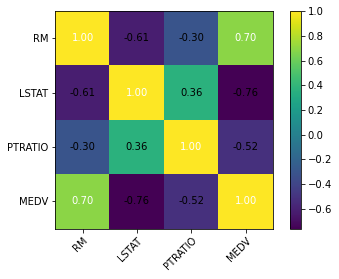

In [51]:
# Here we find the correlation amongst different features to find which one are more important ones

from mlxtend.plotting import heatmap

cols = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [52]:
# The code below gives the same output as above but without any visualizations

df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


## Detecting Outliers

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

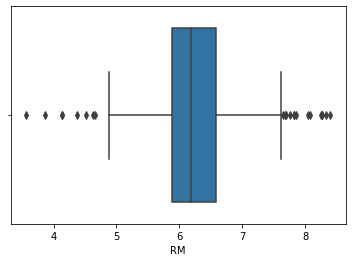

In [53]:
sns.boxplot(df['RM'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

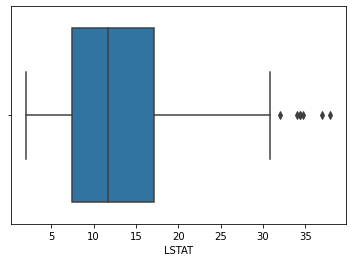

In [54]:
sns.boxplot(df['LSTAT'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

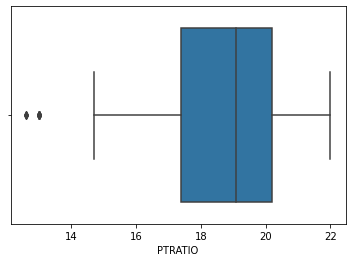

In [55]:
sns.boxplot(df['PTRATIO'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

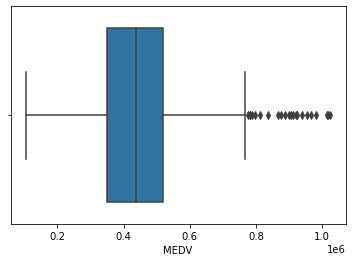

In [56]:
sns.boxplot(df['MEDV'])

**There are several outliers in each feature, removing all of them will strongly affect our model.<br>We decided not to remove them.**

## Modelling
**A Linear Regression uses two axis (X-axis & Y-axis), here we separate our data into two variable X & Y.**

In [57]:
model=LinearRegression()

In [58]:
x=df.drop('MEDV',axis=1).values
y=df['MEDV'].values

In [59]:
# Here we fit our X and Y axis into the LinearRegression Model

model.fit(x,y)

LinearRegression()

In [60]:
# Here we evalutate our model

model.fit(x,y).score(x,y)

0.7176275212982739

In [61]:
# Predicting model performance with our choosen values (inputs)

model.fit(x,y).predict([[7,5,19]])

array([596824.15046081])

## Conclusion
**The overall accuracy of our model is 0.7176 (72%), which is good.**
**Considering the model does not overfits or underfits and still manages to give 72% accuracy even with outliers we can call this model optimal.**